# Modelado

En este archivo se analiza la viabilidad de distintos modelos de Machine Learning, considerando que se parte de unos datos no balanceados, con una fracción de positivos en HeartDisease muy inferior a la de negativos. Por este motivo, se plantea una estrategia orientada a compensar las dos fracciones y optimizar el recall, que ha sido la métrica seleccionada para este estudio.
<p align="center">
<img   src="../resources/img/estrategia.JPG" width="600px"></p>



In [2]:
# Carga de librerías

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Dataframes empleados

df=pd.read_csv('../data/df.csv', sep=',')
df_test=pd.read_csv('../data/df_test.csv', sep=',')
df_outliers=pd.read_csv('../data/df_outliers.csv', sep=',')
df_sin_outliers=pd.read_csv('../data/df_sin_outliers.csv', sep=',')
df_outliers_test=pd.read_csv('../data/df_outliers_test.csv', sep=',')
df_sin_outliers_test=pd.read_csv('../data/df_sin_outliers_test.csv', sep=',')

In [4]:
# Función empleada para la aplicación de los modelos

def aplicar_modelo(dataframe_val, dataframe_test, model):

    X = dataframe_val.drop(['HeartDisease'], axis=1)
    y = dataframe_val['HeartDisease']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)

    X_test = dataframe_test.drop(['HeartDisease'], axis=1)
    y_test = dataframe_test['HeartDisease']
    y_pred = model.predict(X_test)


    c_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    import seaborn as sns
    sns.heatmap(c_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual');

    print('TRAIN')

    print('Accuracy score:', round((accuracy_score(y_val, prediction)),4))
    print('Precision:', round((precision_score(y_val, prediction)),4))
    print('Recall:', round((recall_score(y_val, prediction)),4))
    print('F1 Score:', round((f1_score(y_val, prediction)),4))

    print('TEST')

    print('Accuracy score:', round((accuracy_score(y_test, y_pred)),4))
    print('Precision:', round((precision_score(y_test, y_pred)),4))
    print('Recall:', round((recall_score(y_test, y_pred)),4))
    print('F1 Score:', round((f1_score(y_test, y_pred)),4))

    return

# 1.- Logistic Regression

## 1.1.- Dataframe original

TRAIN
Accuracy score: 0.9123
Precision: 0.5556
Recall: 0.1131
F1 Score: 0.188
TEST
Accuracy score: 0.9108
Precision: 0.5311
Recall: 0.1095
F1 Score: 0.1816


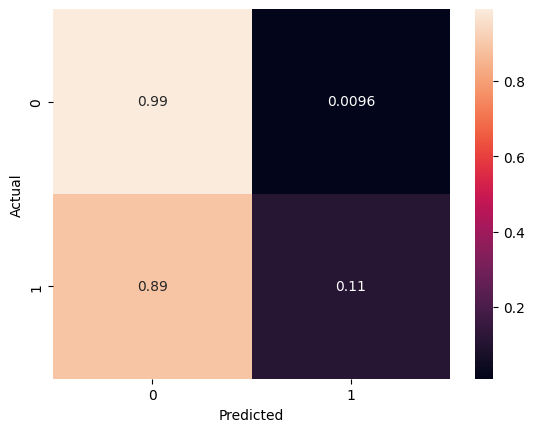

In [4]:
dataframe_val=df
dataframe_test= df_test
model= LogisticRegression(max_iter=1000)
aplicar_modelo(dataframe_val, dataframe_test, model)

## 1.2.- Outliers

TRAIN
Accuracy score: 0.8687
Precision: 0.583
Recall: 0.1817
F1 Score: 0.2771
TEST
Accuracy score: 0.8667
Precision: 0.559
Recall: 0.1689
F1 Score: 0.2594


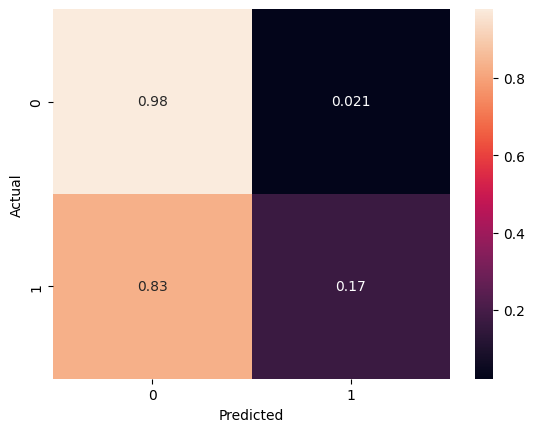

In [5]:
dataframe_val=df_outliers
dataframe_test= df_outliers_test
model= LogisticRegression(max_iter=1000)
aplicar_modelo(dataframe_val, dataframe_test, model)

## 1.3.- Sin outliers

TRAIN
Accuracy score: 0.9109
Precision: 0.5549
Recall: 0.1148
F1 Score: 0.1902
TEST
Accuracy score: 0.9104
Precision: 0.5334
Recall: 0.108
F1 Score: 0.1797


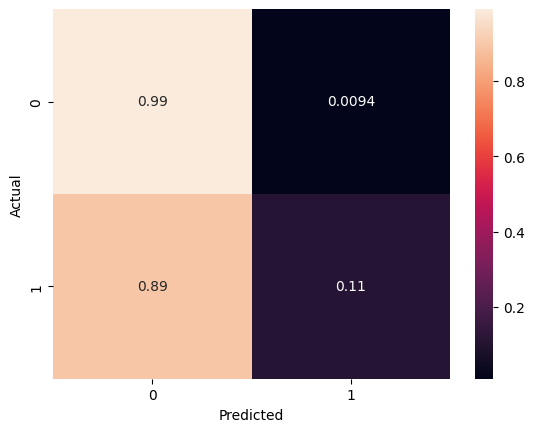

In [6]:
dataframe_val=df_sin_outliers
dataframe_test= df_sin_outliers_test
model= LogisticRegression(max_iter=1000)
aplicar_modelo(dataframe_val, dataframe_test, model)

Datos obtenidos en test del modelo Logistic Regression

| Parámetro | df_sin_outliers | df original | df_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.9104 | 0.9108 | 0.8667 |
| Precision | 0.5334 | 0.5311 | 0.559 |
| Recall | 0.1080 | 0.1095 | 0.1689 |
| F1 | 0.1797 | 0.1816 | 0.2594 | 

El modelo no consigue clasificar correctamente los positivos, ya que tiene un recall muy bajo. Esto se debe a que los datos no están balanceados, la clase de positivos es únicamente un 9% del total. 

# 2.- Logistic Regression balanceada

En este apartado se intentará solucionar el problema de los datos no balanceados, utilizando un parámetro de Logistic Regression llamado *class_weight*, que regula los pesos asociados a cada clase.

El valor por defecto es 1, de forma que todas las clases tienen el mismo peso, pero existe la posibilidad de equilibrar los pesos en el caso de datos no balanceados, con la opción 'balanced', que asigna pesos a cada clase de forma inversamente proporcional a su frecuencia.

Los pesos de cada clase se calculan con la fórmula:
wj=n_samples / (n_classes * n_samplesj)

Siendo cada variable:
- wj: peso de cada clase j
- n_samples: número total de filas en el dataset
- n_classes: número total de clases en la variable target
- n_samplesj: número de filas de cada clase j

Para nuestro dataset:

In [18]:
n_samples = df.shape[0]
n_classes = 2
n_samples_yes = df[df['HeartDisease']==1].shape[0]
n_samples_no = df[df['HeartDisease']==0].shape[0]

In [19]:
n_samples_yes

21811

In [20]:
n_samples_no

219562

In [23]:
w_yes= round(n_samples/(n_classes*n_samples_yes),2)
w_yes

5.53

In [24]:
w_no= round(n_samples/(n_classes*n_samples_no),2)
w_no

0.55

Al utilizar *class_weight='balanced'*, en lugar de asignar un peso igual a 1 a cada clase, se asigna 0.55 a la fracción mayoritaria y 5.53 a la fracción minoritaria. Esto es aplicable a los 4 modelos considerados: Logistic Regression, Decision Tree Classifier, Random Forest y Linear SVC.

## 2.1.- Dataframe original

TRAIN
Accuracy score: 0.7434
Precision: 0.2261
Recall: 0.7677
F1 Score: 0.3493
TEST
Accuracy score: 0.7445
Precision: 0.2278
Recall: 0.7655
F1 Score: 0.3511


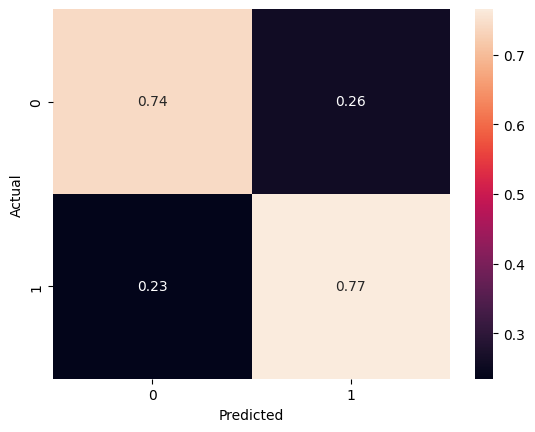

In [7]:
dataframe_val=df
dataframe_test= df_test
model= LogisticRegression(max_iter=1000, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 2.2.- Outliers

TRAIN
Accuracy score: 0.7387
Precision: 0.3169
Recall: 0.7671
F1 Score: 0.4486
TEST
Accuracy score: 0.73
Precision: 0.3062
Recall: 0.7534
F1 Score: 0.4355


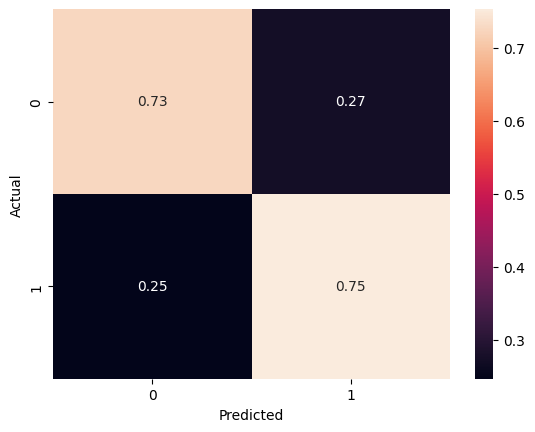

In [8]:
dataframe_val=df_outliers
dataframe_test= df_outliers_test
model= LogisticRegression(max_iter=1000, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 2.3.- Sin outliers

TRAIN
Accuracy score: 0.7451
Precision: 0.2333
Recall: 0.7848
F1 Score: 0.3596
TEST
Accuracy score: 0.7435
Precision: 0.2285
Recall: 0.7672
F1 Score: 0.3522


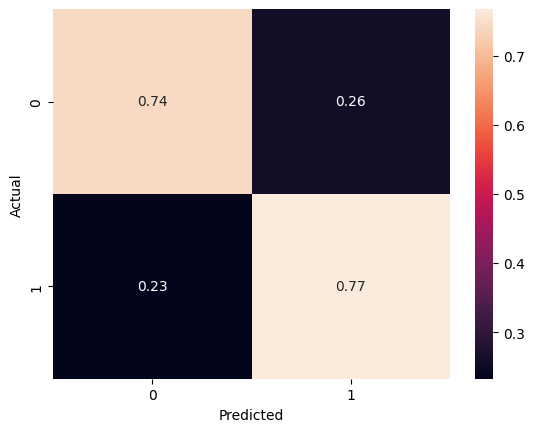

In [9]:
dataframe_val=df_sin_outliers
dataframe_test= df_sin_outliers_test
model= LogisticRegression(max_iter=1000, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

Datos obtenidos en test

| Parámetro | df_sin_outliers | df original | df_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.7435 | 0.7445 | 0.7300 |
| Precision | 0.2285 | 0.2278 | 0.3062 |
| Recall | 0.7672 | 0.7655 | 0.7534 |
| F1 | 0.3522 | 0.3511 | 0.4355 | 

Recall ha mejorado de forma importante, al tener en cuenta que son datos no balanceados, y así la detección de los casos positivos mejora. En cambio, precision ha disminuido considerablemente.

# 3.- Decision Tree Clasiffier 

## 3.1.- Dataframe original

A continuación se valorará el modelo Decision Tree Clasiffier, considerando tanto el dataframe original, como separando los outliers.

In [7]:
from sklearn.tree import DecisionTreeClassifier

TRAIN
Accuracy score: 0.8575
Precision: 0.2285
Recall: 0.2475
F1 Score: 0.2376
TEST
Accuracy score: 0.8553
Precision: 0.2241
Recall: 0.2446
F1 Score: 0.2339


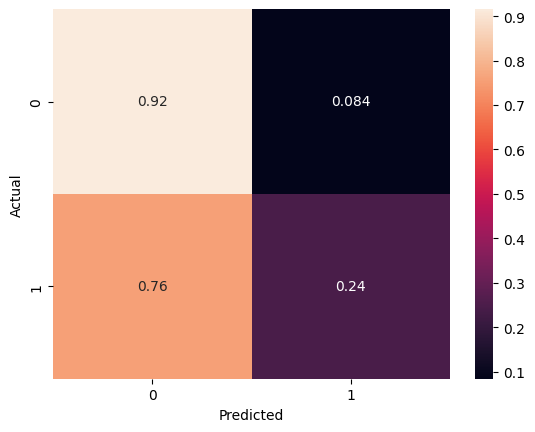

In [15]:
dataframe_val=df
dataframe_test= df_test
model = DecisionTreeClassifier(random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

## 3.2.- Outliers

TRAIN
Accuracy score: 0.794
Precision: 0.2795
Recall: 0.3088
F1 Score: 0.2934
TEST
Accuracy score: 0.8001
Precision: 0.2958
Recall: 0.323
F1 Score: 0.3088


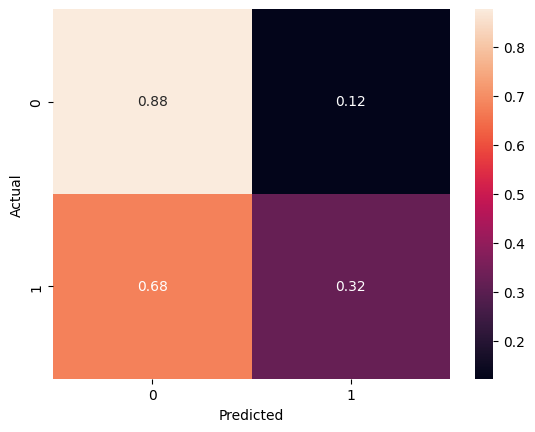

In [14]:
dataframe_val=df_outliers
dataframe_test= df_outliers_test
model = DecisionTreeClassifier(random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

## 3.3.- Sin outliers

TRAIN
Accuracy score: 0.8534
Precision: 0.2329
Recall: 0.2649
F1 Score: 0.2478
TEST
Accuracy score: 0.8538
Precision: 0.2263
Recall: 0.2515
F1 Score: 0.2383


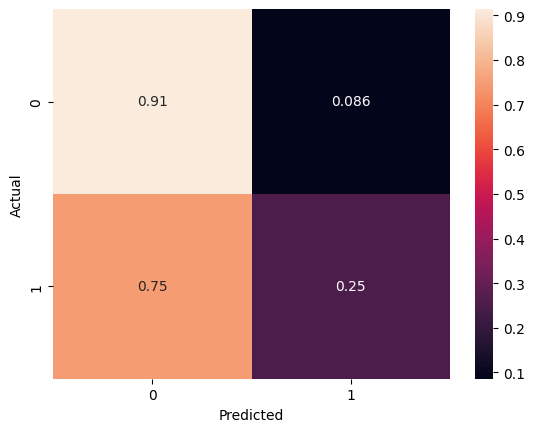

In [15]:
dataframe_val=df_sin_outliers
dataframe_test= df_sin_outliers_test
model = DecisionTreeClassifier(random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

Datos obtenidos en test

| Parámetro | df_sin_outliers | df original | df_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.8538 | 0.8553 | 0.8001 |
| Precision | 0.2263 | 0.2241 | 0.2958 |
| Recall | 0.2515 | 0.2446 | 0.3230 |
| F1 | 0.2383 | 0.2339 | 0.3088 | 

# 4.- Decision Tree Classifier balanceado

Al igual que en Logistic Regression, se considera la clase class_weight para intentar solucionar el problema del no balanceo de los datos. 

## 4.1.- Dataframe original

TRAIN
Accuracy score: 0.8614
Precision: 0.2265
Recall: 0.2256
F1 Score: 0.2261
TEST
Accuracy score: 0.8615
Precision: 0.232
Recall: 0.2306
F1 Score: 0.2313


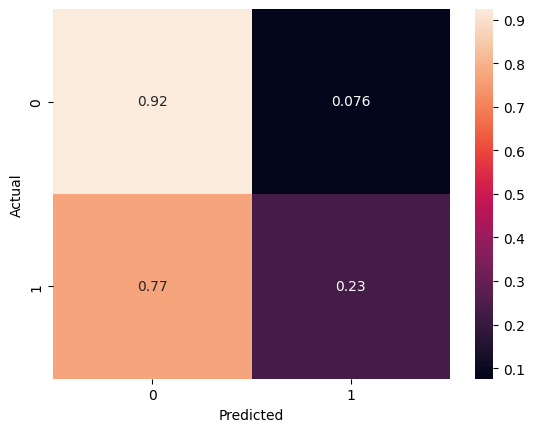

In [16]:
dataframe_val=df
dataframe_test= df_test
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 4.2.- Outliers

TRAIN
Accuracy score: 0.8022
Precision: 0.2801
Recall: 0.2726
F1 Score: 0.2763
TEST
Accuracy score: 0.8043
Precision: 0.2916
Recall: 0.2911
F1 Score: 0.2913


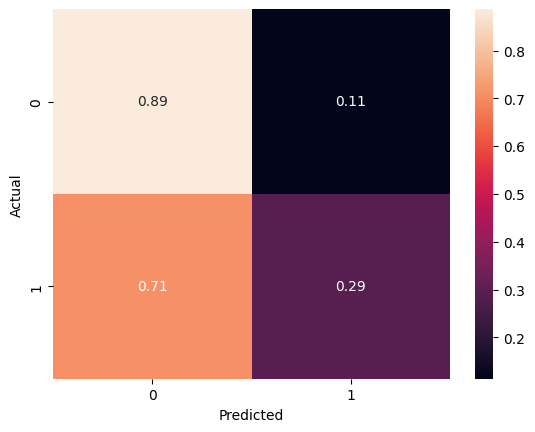

In [17]:
dataframe_val=df_outliers
dataframe_test= df_outliers_test
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 4.3.- Sin outliers

TRAIN
Accuracy score: 0.8614
Precision: 0.2316
Recall: 0.2241
F1 Score: 0.2278
TEST
Accuracy score: 0.8607
Precision: 0.2274
Recall: 0.2222
F1 Score: 0.2248


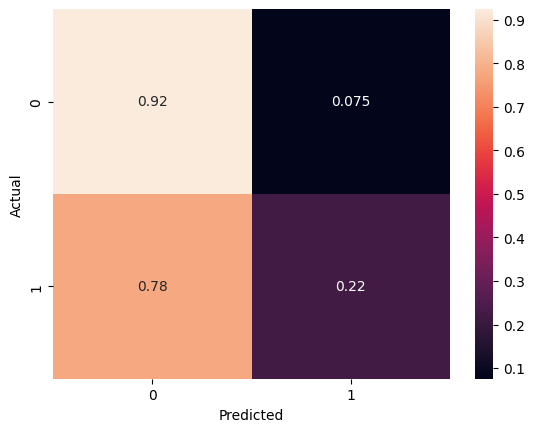

In [8]:
dataframe_val=df_sin_outliers
dataframe_test= df_sin_outliers_test
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

Datos obtenidos en test

| Parámetro | df_outliers | df original | df_sin_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.8043 | 0.8615 | 0.8607 |
| Precision | 0.2916 | 0.2320 | 0.2274 |
| Recall | 0.2911 | 0.2306 | 0.2222 |
| F1 | 0.2913 | 0.2313 | 0.2248 | 

Apenas hay diferencia en este modelo utilizando la opción *class_weight= 'balanced'*. El modelo continúa con una baja precision y un bajo recall, y no es adecuado para la clasificación de las dos fracciones.

# 5.- Random Forest  Classifier balanceado

## 5.1.- Dataframe original

TRAIN
Accuracy score: 0.9
Precision: 0.3171
Recall: 0.0991
F1 Score: 0.151
TEST
Accuracy score: 0.8999
Precision: 0.3252
Recall: 0.1007
F1 Score: 0.1538


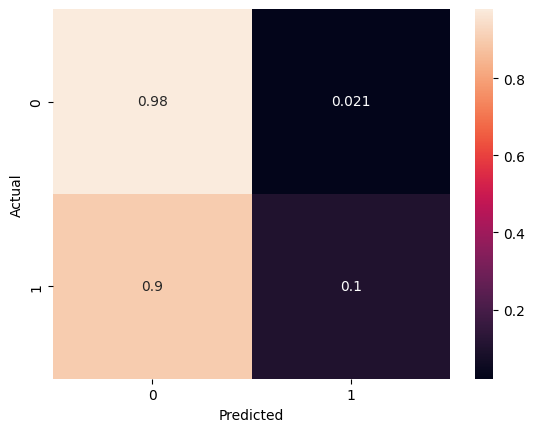

In [6]:
from sklearn.ensemble import RandomForestClassifier
dataframe_val=df
dataframe_test= df_test
model = RandomForestClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 5.2.- Outliers

TRAIN
Accuracy score: 0.8659
Precision: 0.5588
Recall: 0.153
F1 Score: 0.2402
TEST
Accuracy score: 0.8624
Precision: 0.5087
Recall: 0.136
F1 Score: 0.2147


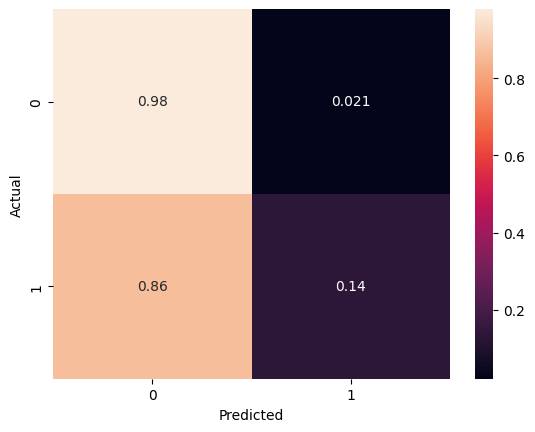

In [20]:
dataframe_val=df_outliers
dataframe_test= df_outliers_test
model = RandomForestClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

## 5.3.- Sin outliers

TRAIN
Accuracy score: 0.9008
Precision: 0.3383
Recall: 0.0912
F1 Score: 0.1436
TEST
Accuracy score: 0.9014
Precision: 0.3512
Recall: 0.1002
F1 Score: 0.1559


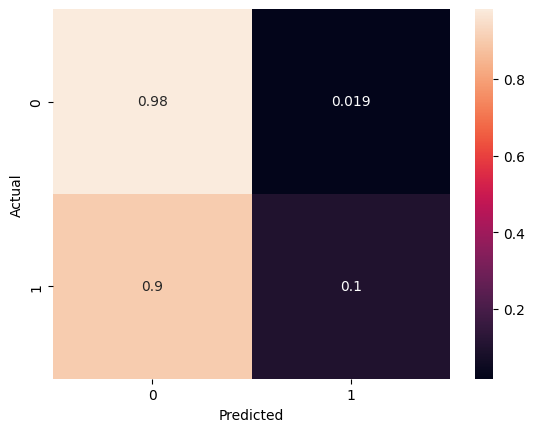

In [21]:
dataframe_val=df_sin_outliers
dataframe_test= df_sin_outliers_test
model = RandomForestClassifier(random_state=42, class_weight='balanced')
aplicar_modelo(dataframe_val, dataframe_test, model)

Datos obtenidos en test

| Parámetro | df_sin_outliers | df original | df_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.9014 | 0.8999 | 0.8624 |
| Precision | 0.3512 | 0.3252 | 0.5087 |
| Recall | 0.1002 | 0.1007 | 0.1360 |
| F1 | 0.1559 | 0.1538 | 0.2147 | 

Random Forest no aporta buenos resultados, aunque se balanceen los datos antes de aplicar el algoritmo. Recall tiene un valor muy bajo, y no se consigue separar la fracción minoritaria de forma aceptable.

Por lo visto hasta ahora, en ningún modelo se percibe una diferencia apreciable en los resultados obtenidos con los outliers, que justifique un análisis por separado. A partir de ahora, se continúa el estudio únicamente con el dataframe que engloba todos los datos, sin diferenciar los outliers.

# 6.- Linear SVC

In [11]:
from sklearn.svm import LinearSVC

TRAIN
Accuracy score: 0.7388
Precision: 0.2234
Recall: 0.7721
F1 Score: 0.3466
TEST
Accuracy score: 0.7399
Precision: 0.2253
Recall: 0.771
F1 Score: 0.3488


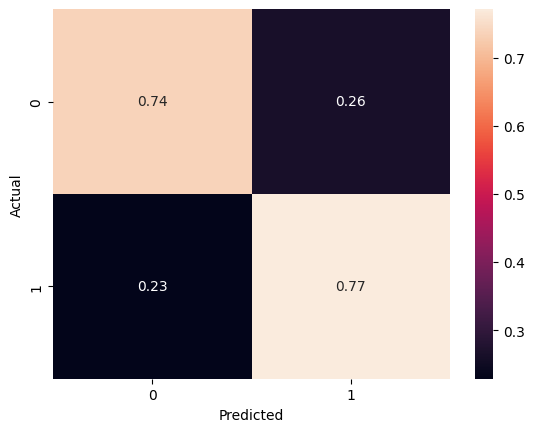

In [23]:
dataframe_val=df
dataframe_test= df_test
model= LinearSVC(C=100, class_weight='balanced', max_iter=100000, dual='auto')
aplicar_modelo(dataframe_val, dataframe_test, model)

TRAIN
Accuracy score: 0.7389
Precision: 0.2235
Recall: 0.7721
F1 Score: 0.3466
TEST
Accuracy score: 0.7399
Precision: 0.2253
Recall: 0.771
F1 Score: 0.3488


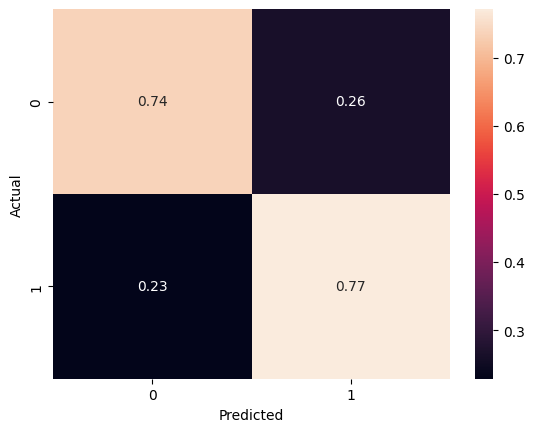

In [24]:
dataframe_val=df
dataframe_test= df_test
model= LinearSVC(C=1000, class_weight='balanced', max_iter=100000, dual='auto')
aplicar_modelo(dataframe_val, dataframe_test, model)

El número de iteraciones utilizado es el necesario para alcanzar la convergencia, ya que en cálculos con valores inferiores, VSC da un mensaje de error recomendando un número de iteraciones más alto.

# 7.- GridsearchCV

Es necesario ajustar los hiperparámetros de cada modelo planteado para optimizar los resultados. Se utiliza *GridSearchCV* para obtener estos hiperparámetros, y a la vez plantear un método de *cross validation*. 

## 7.1.- Logistic Regression

TRAIN
Accuracy score: 0.7434
Precision: 0.2261
Recall: 0.7677
F1 Score: 0.3493
TEST
Accuracy score: 0.7445
Precision: 0.2278
Recall: 0.7655
F1 Score: 0.3511


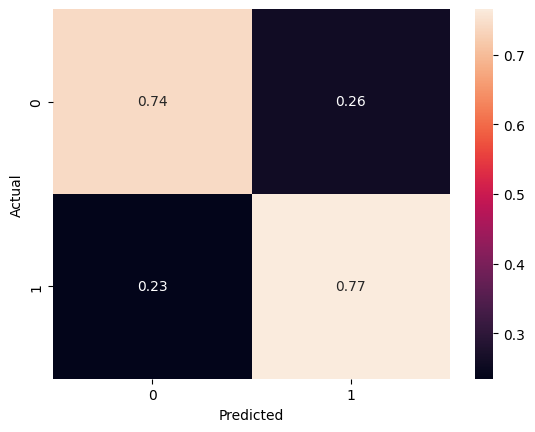

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_iter': [300, 500, 700, 1000],
    'penalty': ['l2', None],
    'solver':['newton-cholesky','lbfgs' ]
}

#Estimador a probar en el gridsearch
estimator = LogisticRegression(class_weight='balanced')
                              

#Creamos el gridsearch
grid1 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  cv=5,
                  scoring="recall"
                  )
model=grid1
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)

In [30]:
grid1.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=300,
                   solver='newton-cholesky')

In [31]:
grid1.best_params_

{'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cholesky'}

In [32]:
grid1.best_score_

0.7802631578947369

TRAIN
Accuracy score: 0.7434
Precision: 0.2261
Recall: 0.7677
F1 Score: 0.3493
TEST
Accuracy score: 0.7445
Precision: 0.2278
Recall: 0.7655
F1 Score: 0.3511


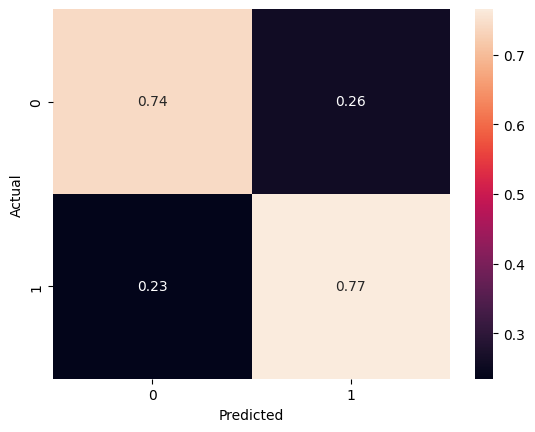

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_iter': range(10,150,10),
}

#Estimador a probar en el gridsearch
estimator = LogisticRegression(class_weight='balanced', solver= 'newton-cholesky')
                              

#Creamos el gridsearch
grid2 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  cv=5,
                  scoring="recall",
                  )
model=grid2
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)

In [34]:
grid2.best_params_

{'max_iter': 10}

In [35]:
grid2.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=10,
                   solver='newton-cholesky')

In [36]:
grid2.best_score_

0.7802631578947369

## 7.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.6348
Precision: 0.1788
Recall: 0.8545
F1 Score: 0.2957
TEST
Accuracy score: 0.6337
Precision: 0.1777
Recall: 0.8422
F1 Score: 0.2934


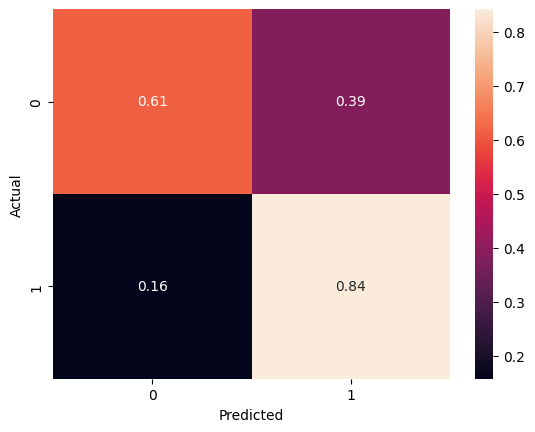

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2,4,6,8,10],
 }

#Estimador a probar en el gridsearch
estimator = DecisionTreeClassifier(random_state=42, class_weight='balanced')
                              

#Creamos el gridsearch
grid3 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  cv=5,
                  scoring="recall"
                  )
model = grid3
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)

In [14]:
grid3.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [15]:
grid3.best_score_

0.8474828375286041

In [16]:
grid3.best_params_

{'max_depth': 3, 'min_samples_split': 2}

## 7.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.6983
Precision: 0.205
Recall: 0.8211
F1 Score: 0.3281
TEST
Accuracy score: 0.6994
Precision: 0.2056
Recall: 0.813
F1 Score: 0.3282


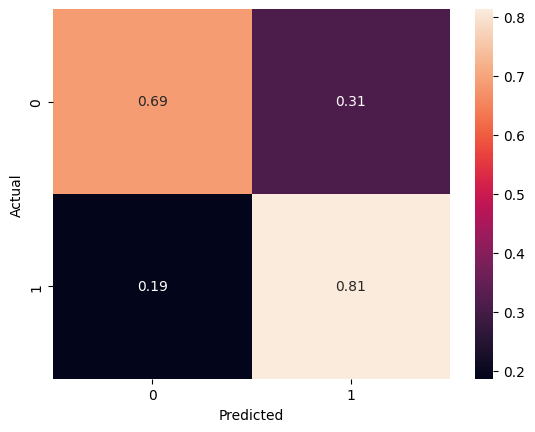

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': range(10,150,10),
    'max_depth': range(2, 20,2),
 }

#Estimador a probar en el gridsearch
estimator = RandomForestClassifier(random_state=42, class_weight='balanced')
                              

#Creamos el gridsearch
grid4 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  cv=5,
                  scoring="recall"
                  )
model = grid4
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)

In [13]:
grid4.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30,
                       random_state=42)

In [14]:
grid4.best_params_

{'max_depth': 6, 'n_estimators': 30}

In [15]:
grid4.best_score_

0.8253432494279176

TRAIN
Accuracy score: 0.6983
Precision: 0.205
Recall: 0.8211
F1 Score: 0.3281
TEST
Accuracy score: 0.6994
Precision: 0.2056
Recall: 0.813
F1 Score: 0.3282


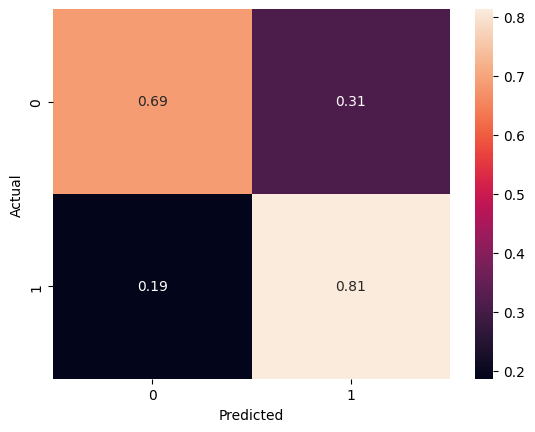

In [52]:
dataframe_val=df
dataframe_test= df_test
model= RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30,random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

In [53]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False)

,Valor
AgeCategory,0.434374
GenHealth,0.204169
DiffWalking,0.101192
Stroke,0.062224
Diabetic,0.062199
Sex,0.039967
PhysicalHealth,0.039191
KidneyDisease,0.017129
Smoking,0.014929
SkinCancer,0.006167


Se observa que los factores más importantes considerados en este modelo son la edad y el estado general de salud.

## 7.4.- LinearSVC

TRAIN
Accuracy score: 0.7389
Precision: 0.2235
Recall: 0.7721
F1 Score: 0.3466
TEST
Accuracy score: 0.7399
Precision: 0.2253
Recall: 0.771
F1 Score: 0.3488


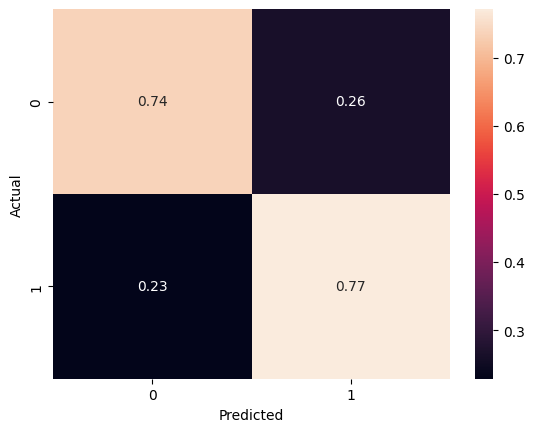

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'C': [10,50,100,200],
    }

#Estimador a probar en el gridsearch
estimator =  LinearSVC(class_weight='balanced', dual='auto',max_iter=100000)
                              

#Creamos el gridsearch
grid5 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  cv=5,
                  scoring="recall"
                  )

model=grid5
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)

In [ ]:
grid5.best_estimator_

LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)

In [ ]:
grid5.best_params_

{'C': 10}

In [ ]:
grid5.best_score_

0.786842105263158

Datos obtenidos de los modelos optimizados

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7445 | 0.6337 | 0.6994 | 0.7399 |
| Precision | 0.2278 | 0.1777 | 0.2056| 0.2253 |
| Recall | 0.7655 | 0.8422 | 0.8130 | 0.7710 |
| F1 | 0.3511 | 0.2934 | 0.3282 | 0.3488 |

# 8.- Oversampling

En este apartado se considera otra técnica específica para datos no balanceados denominada oversampling, que consiste en la generación aleatoria de nuevos datos, para equilibrar las dos fracciones. A su vez, se probarán los cuatro modelos con sus hiperparámetros optimizados.

In [7]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [8]:
'''Función para aplicar un algoritmo utilizando previamente otro algoritmo de oversampling o undersampling.
Esta función se aplicará con los algoritmos ROS, RUS, ADASYN, y SVMSMOTE.'''

def modelo_preprocesado(dataframe_val, dataframe_test, model, preproceso):

    X = dataframe_val.drop(['HeartDisease'], axis=1)
    y = dataframe_val['HeartDisease']

    X_res, y_res = preproceso.fit_resample(X, y)

    X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)

    X_test = dataframe_test.drop(['HeartDisease'], axis=1)
    y_test = dataframe_test['HeartDisease']
    y_pred = model.predict(X_test)


    c_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    import seaborn as sns
    sns.heatmap(c_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    print('TRAIN')

    print('Accuracy score:', round((accuracy_score(y_val, prediction)),4))
    print('Precision:', round((precision_score(y_val, prediction)),4))
    print('Recall:', round((recall_score(y_val, prediction)),4))
    print('F1 Score:', round((f1_score(y_val, prediction)),4))

    print('TEST')

    print('Accuracy score:', round((accuracy_score(y_test, y_pred)),4))
    print('Precisión:', round((precision_score(y_test, y_pred)),4))
    print('Recall:', round((recall_score(y_test, y_pred)),4))
    print('F1 Score:', round((f1_score(y_test, y_pred)),4))

    return

## 8.1.- Logistic Regression

TRAIN
Accuracy score: 0.761
Precision: 0.7505
Recall: 0.7814
F1 Score: 0.7656
TEST
Accuracy score: 0.7429
Precisión: 0.2268
Recall: 0.7666
F1 Score: 0.35


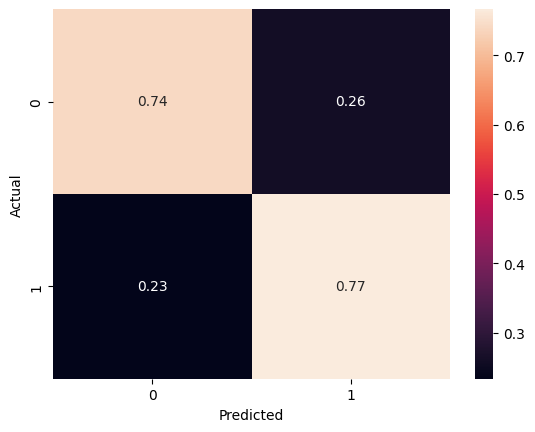

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomOverSampler(random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 8.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.7324
Precision: 0.6869
Recall: 0.8535
F1 Score: 0.7612
TEST
Accuracy score: 0.6337
Precisión: 0.1777
Recall: 0.8422
F1 Score: 0.2934


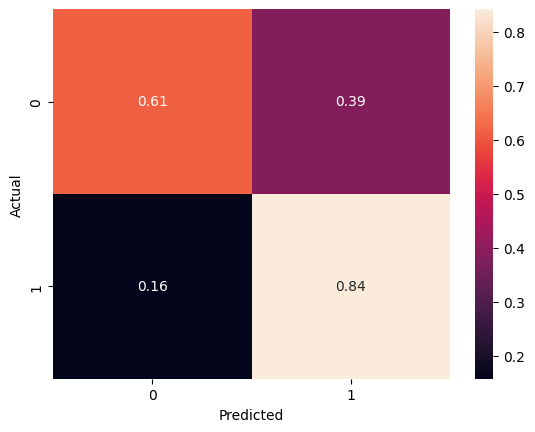

In [49]:
from sklearn.tree import DecisionTreeClassifier
dataframe_val=df
dataframe_test= df_test
preproceso=RandomOverSampler(random_state=42)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

In [51]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False).head()

,Valor
AgeCategory,0.604445
GenHealth,0.318040
Sex,0.047426
Stroke,0.030090
Diabetic,0.000000


Los dos factores que más influyen en la clasificación son la edad y el estado de salud en general.

## 8.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.7567
Precision: 0.7275
Recall: 0.8202
F1 Score: 0.7711
TEST
Accuracy score: 0.7047
Precisión: 0.2073
Recall: 0.8039
F1 Score: 0.3296


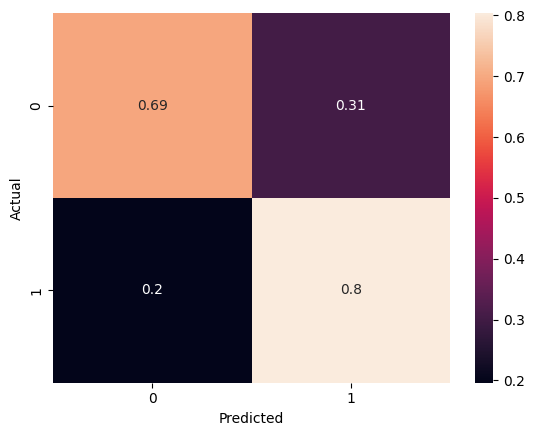

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomOverSampler(random_state=42)
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 8.4.- Linear SVC

TRAIN
Accuracy score: 0.7612
Precision: 0.7478
Recall: 0.7878
F1 Score: 0.7673
TEST
Accuracy score: 0.738
Precisión: 0.2242
Recall: 0.773
F1 Score: 0.3476


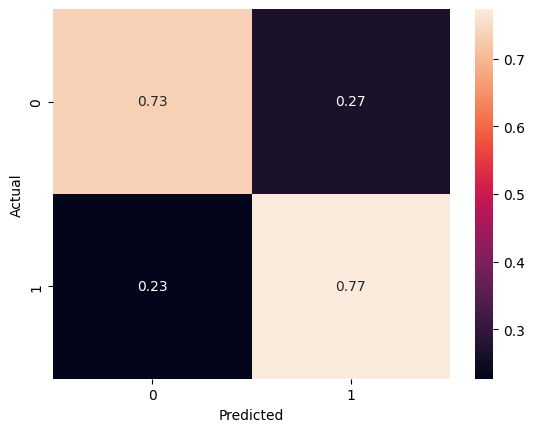

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomOverSampler(random_state=42)
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

Datos obtenidos en test

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7429 | 0.6337 | 0.7047| 0.7380 |
| Precision | 0.2268 | 0.1777 | 0.2073 | 0.2242 |
| Recall | 0.7666 | 0.8422 | 0.8039 | 0.7730 |
| F1 | 0.3500 | 0.2934 | 0.3296 | 0.3476 |

# 9.- Undersampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler

## 9.1.- Logistic Regression

TRAIN
Accuracy score: 0.7464
Precision: 0.7368
Recall: 0.7585
F1 Score: 0.7475
TEST
Accuracy score: 0.7446
Precisión: 0.2278
Recall: 0.7648
F1 Score: 0.351


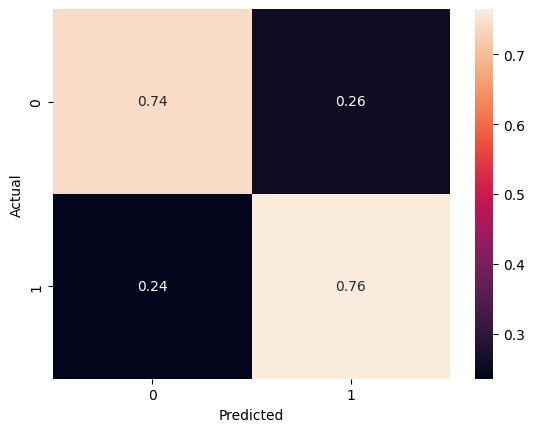

In [23]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomUnderSampler(random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 9.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.7238
Precision: 0.6763
Recall: 0.8476
F1 Score: 0.7524
TEST
Accuracy score: 0.6337
Precisión: 0.1777
Recall: 0.8422
F1 Score: 0.2934


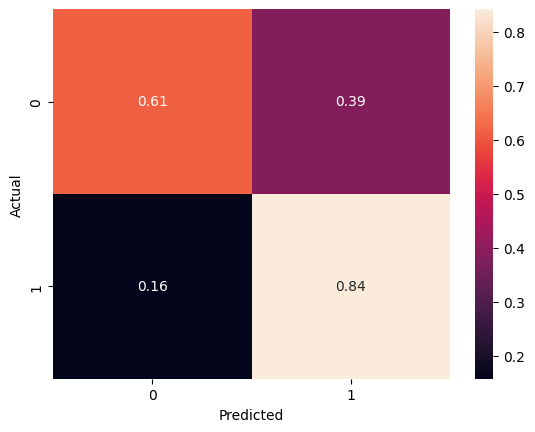

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
dataframe_val=df
dataframe_test= df_test
preproceso=RandomUnderSampler(random_state=42)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

In [10]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.02939538, 0.        ,
       0.        , 0.        , 0.05100433, 0.60721782, 0.        ,
       0.        , 0.        , 0.31238248, 0.        , 0.        ,
       0.        , 0.        ])

In [12]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False).head()

,Valor
AgeCategory,0.607218
GenHealth,0.312382
Sex,0.051004
Stroke,0.029395
Diabetic,0.000000


array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'], dtype=object)

## 9.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.7468
Precision: 0.7128
Recall: 0.8182
F1 Score: 0.7619
TEST
Accuracy score: 0.6988
Precisión: 0.2046
Recall: 0.809
F1 Score: 0.3267


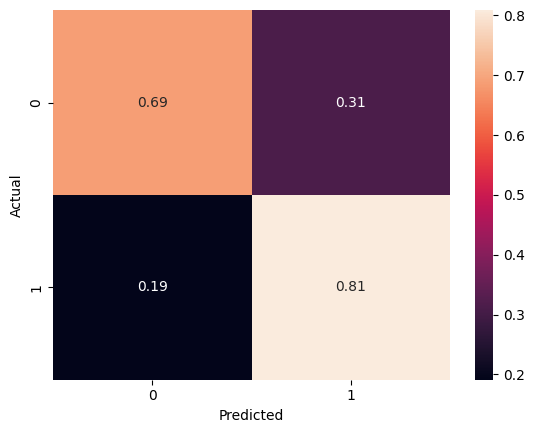

In [58]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomUnderSampler(random_state=42)
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

In [59]:
model.feature_importances_

array([0.00526027, 0.01413612, 0.00116485, 0.05951808, 0.03572276,
       0.00369306, 0.09572624, 0.04123853, 0.44253114, 0.00666698,
       0.06126425, 0.00319322, 0.20559016, 0.00326768, 0.00062163,
       0.01737867, 0.00302637])

In [61]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False)

,Valor
AgeCategory,0.442531
GenHealth,0.205590
DiffWalking,0.095726
Diabetic,0.061264
Stroke,0.059518
Sex,0.041239
PhysicalHealth,0.035723
KidneyDisease,0.017379
Smoking,0.014136
Race,0.006667


## 9.4.- Linear SVC

TRAIN
Accuracy score: 0.7474
Precision: 0.7346
Recall: 0.7666
F1 Score: 0.7503
TEST
Accuracy score: 0.74
Precisión: 0.2252
Recall: 0.7703
F1 Score: 0.3486


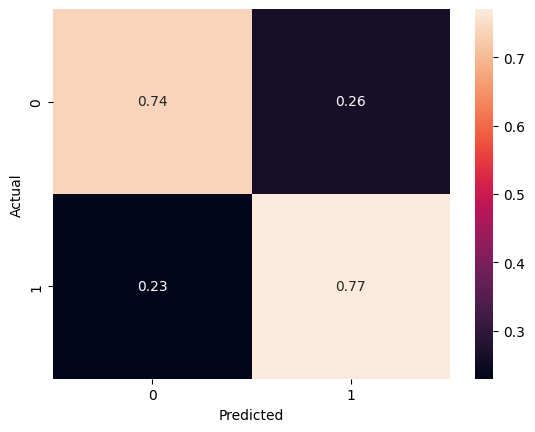

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=RandomUnderSampler(random_state=42)
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

Datos obtenidos en test

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7446 | 0.6337 | 0.6988 | 0.7400 |
| Precision | 0.2278 | 0.1777 | 0.2046 | 0.2252 |
| Recall | 0.7648 | 0.8422 | 0.8090 | 0.7703 |
| F1 | 0.3510 | 0.2934 | 0.3267 | 0.3486 |

# 10.- SMOTE

SMOTE, acrónimo de Synthetic Minority Over-sampling Technique, es una técnica basada en generar de forma sintética nuevos elementos de la clase minoritaria usando como referencia los elementos de dicha clase ya presentes en el conjunto de datos. Para ello, a partir de un elemento de la clase minoritaria elegido al azar, se escoge un número k de vecinos más cercanos y se genera un nuevo elemento combinándolos linealmente de forma ponderada introduciendo un factor aleatorio para generar elementos parecidos. 

In [16]:
from imblearn.over_sampling import SMOTE

In [14]:
def aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors):

    X = dataframe_val.drop(['HeartDisease'], axis=1)
    y = dataframe_val['HeartDisease']

    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)

    X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)

    X_test = dataframe_test.drop(['HeartDisease'], axis=1)
    y_test = dataframe_test['HeartDisease']
    y_pred = model.predict(X_test)

    print('k=', k_neighbors)

    print('TRAIN')

    print('Accuracy score:', round((accuracy_score(y_val, prediction)),4))
    print('Precision:', round((precision_score(y_val, prediction)),4))
    print('Recall:', round((recall_score(y_val, prediction)),4))
    print('F1 Score:', round((f1_score(y_val, prediction)),4))

    print('TEST')

    print('Accuracy score:', round((accuracy_score(y_test, y_pred)),4))
    print('Precision:', round((precision_score(y_test, y_pred)),4))
    print('Recall:', round((recall_score(y_test, y_pred)),4))
    print('F1 Score:', round((f1_score(y_test, y_pred)),4))

    return

## 10.1.- Logistic Regression

In [ ]:
dataframe_val=df
dataframe_test= df_test
k_neighbors=5
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 5
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138


## 10.2.- Decision Tree Classifier

In [17]:
dataframe_val=df
dataframe_test= df_test
k_neighbors=5
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 5
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032


In [19]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False).head()

,Valor
GenHealth,0.599181
AgeCategory,0.379551
Sex,0.021268
Race,0.000000
KidneyDisease,0.000000


## 10.3.- Random Forest

In [ ]:
dataframe_val=df
dataframe_test= df_test
k_neighbors=5
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 5
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215


## 10.4.- Linear SVC

In [ ]:
dataframe_val=df
dataframe_test= df_test
k_neighbors=5
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 5
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129


Datos obtenidos en test

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7366 | 0.6681 | 0.7212 | 0.7322 |
| Precision | 0.2052 | 0.1870 | 0.206 | 0.2036 |
| Recall | 0.6668 | 0.7994 | 0.7314 | 0.6750 |
| F1 | 0.3138 | 0.3032 | 0.3215 | 0.3129 |

## 10.5.- Análisis de la influencia del valor de k de SMOTE en la aplicación de Decision Tree Classifier

### 10.5.1- Logistic Regression

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
for k_neighbors in range(2, 7):
   aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 2
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138
k= 3
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138
k= 4
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138
k= 5
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138
k= 6
TRAIN
Accuracy score: 0.7706
Precision: 0.7557
Recall: 0.7991
F1 Score: 0.7768
TEST
Accuracy score: 0.7366
Precision: 0.2052
Recall: 0.6668
F1 Score: 0.3138


### 10.5.2- Decision Tree Classifier

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
for k_neighbors in range(2, 7):
   aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)

k= 2
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032
k= 3
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032
k= 4
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032
k= 5
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032
k= 6
TRAIN
Accuracy score: 0.7434
Precision: 0.7071
Recall: 0.8303
F1 Score: 0.7638
TEST
Accuracy score: 0.6681
Precision: 0.187
Recall: 0.7994
F1 Score: 0.3032


### 10.5.3- Random Forest Classifier

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
for k_neighbors in range(2, 7):
   aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)
    

k= 2
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215
k= 3
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215
k= 4
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215
k= 5
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215
k= 6
TRAIN
Accuracy score: 0.7665
Precision: 0.7437
Recall: 0.8126
F1 Score: 0.7766
TEST
Accuracy score: 0.7212
Precision: 0.206
Recall: 0.7314
F1 Score: 0.3215


### 10.5.4- Linear SVC

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
for k_neighbors in range(2, 7):
   aplicar_SMOTE(dataframe_val, dataframe_test, model, k_neighbors)
    

k= 2
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129
k= 3
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129
k= 4
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129
k= 5
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129
k= 6
TRAIN
Accuracy score: 0.7705
Precision: 0.7529
Recall: 0.8046
F1 Score: 0.7779
TEST
Accuracy score: 0.7322
Precision: 0.2036
Recall: 0.675
F1 Score: 0.3129


En el intervalo estudiado de k, entre 2 y 6, no hay ninguna diferencia en la capacidad de separación de los modelos analizados.

# 11.- ADASYN

ADASYN es un algoritmo similar a SMOTE para la generación sintética de nuevos datos.  La idea esencial es utilizar una distribución ponderada para diferentes ejemplos de clases minoritarias según su nivel de dificultad en el aprendizaje, donde se generan más datos sintéticos para ejemplos de clases minoritarias que son más difíciles de aprender en comparación con aquellos ejemplos minoritarios que son más fáciles de aprender. Como resultado, el enfoque ADASYN mejora el aprendizaje con respecto a las distribuciones de datos de dos maneras: (1) reduciendo el sesgo introducido por el desequilibrio de clases, y (2) desplazando adaptativamente el límite de decisión de clasificación hacia los ejemplos difíciles. Los análisis de simulación en varios conjuntos de datos de aprendizaje automático muestran la eficacia de este método en cinco métricas de evaluación.

<p align="center">
<img   src="../resources/img/ADASYN.JPG" width="600px"></p>

## 11.1.- Logistic Regression

In [8]:
from imblearn.over_sampling import ADASYN

TRAIN
Accuracy score: 0.7586
Precision: 0.7434
Recall: 0.7853
F1 Score: 0.7638
TEST
Accuracy score: 0.7276
Precisión: 0.1992
Recall: 0.6673
F1 Score: 0.3068


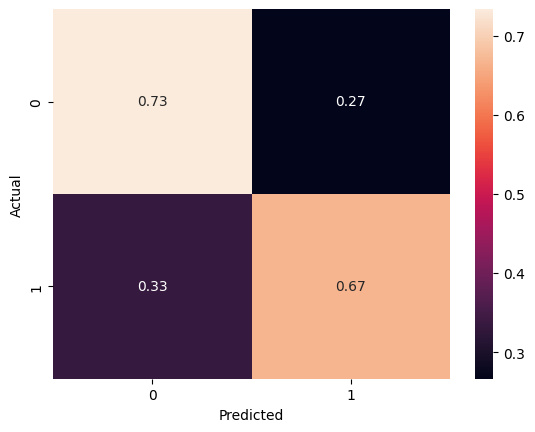

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=ADASYN(random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 11.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.7238
Precision: 0.7056
Recall: 0.7623
F1 Score: 0.7329
TEST
Accuracy score: 0.6889
Precisión: 0.1856
Recall: 0.7217
F1 Score: 0.2952


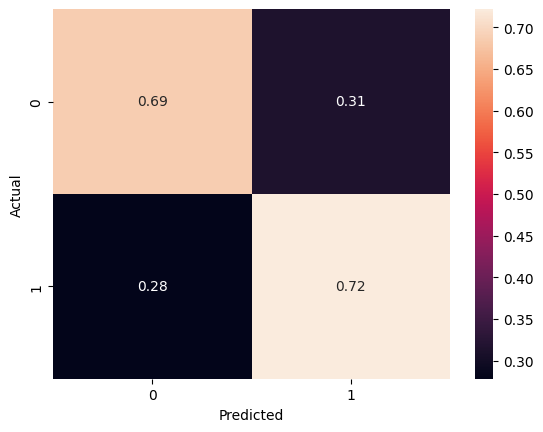

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=ADASYN(random_state=42)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 11.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.7621
Precision: 0.7353
Recall: 0.8143
F1 Score: 0.7728
TEST
Accuracy score: 0.7125
Precisión: 0.2013
Recall: 0.736
F1 Score: 0.3162


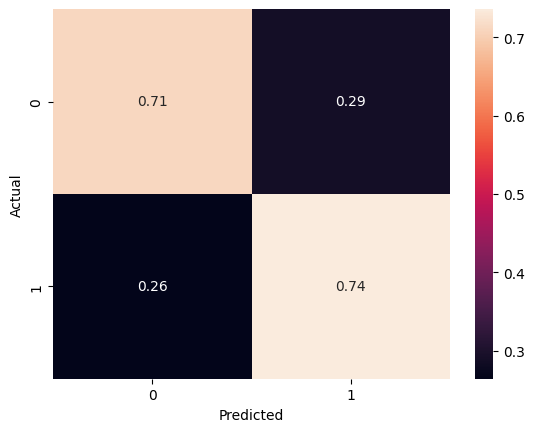

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=ADASYN(random_state=42)
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 11.4.- Linear SVC

TRAIN
Accuracy score: 0.7579
Precision: 0.7397
Recall: 0.791
F1 Score: 0.7645
TEST
Accuracy score: 0.7227
Precisión: 0.1976
Recall: 0.6767
F1 Score: 0.3059


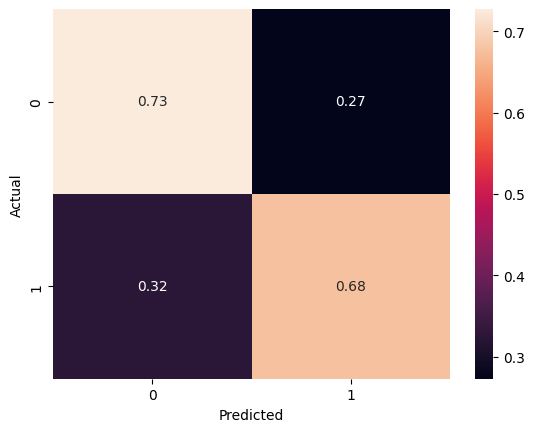

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=ADASYN(random_state=42)
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

Datos obtenidos en test

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7276 | 0.6889 | 0.7125 | 0.7227 |
| Precision | 0.1992 | 0.1856 | 0.2013 | 0.1976 |
| Recall | 0.6673 | 0.7217 | 0.7360 | 0.6767 |
| F1 | 0.3068 | 0.2952 | 0.3162 | 0.3059 |

# 12.- SVMSMOTE 

SVM-SMOTE  es un algoritmo de oversampling que se centra en las muestras situadas en el líımite entre las clases. Es decir, las instancias sinteticas de clase minoritaria serán generadas a lo largo del umbral entre clases, debido a que las muestras situadas en este area son críticas para estimar el límite de decision óptimo. Centrarse sólo en esta sección, es decir, en el borde entre clases, muestra  mejor rendimiento en el proceso de oversampling. En este caso, el borde entre ambas clases es indicado por los vectores de soporte, obtenidos mediante un preprocesado que realiza este modelo antes de proceder a la clasificacion. Las nuevas instancias serán creadas aleatoriamente a lo largo de las líneas que unen cada vector de soporte, compuesto por muestras de la clase minoritaria, con un cierto numero de sus vecinos más cercanos mediante una técnica de interpolación o de extrapolación.
<p align="center">
<img   src="../resources/img/SVMSMOTE.JPG" width="600px"></p>

In [ ]:
from imblearn.over_sampling import SVMSMOTE

## 12.1.- Logistic Regression

TRAIN
Accuracy score: 0.8278
Precision: 0.8186
Recall: 0.8419
F1 Score: 0.8301
TEST
Accuracy score: 0.7982
Precisión: 0.2539
Recall: 0.6369
F1 Score: 0.3631


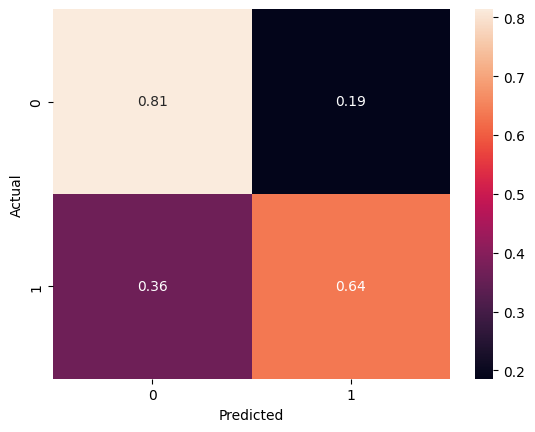

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=SVMSMOTE(random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=10,solver='newton-cholesky')
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 12.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.811
Precision: 0.7972
Recall: 0.834
F1 Score: 0.8152
TEST
Accuracy score: 0.7742
Precisión: 0.2287
Recall: 0.6323
F1 Score: 0.3359


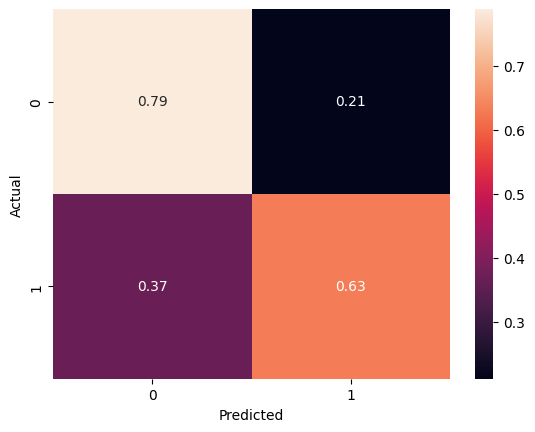

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=SVMSMOTE(random_state=42)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 12.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.8272
Precision: 0.8109
Recall: 0.8531
F1 Score: 0.8315
TEST
Accuracy score: 0.7855
Precisión: 0.2411
Recall: 0.64
F1 Score: 0.3502


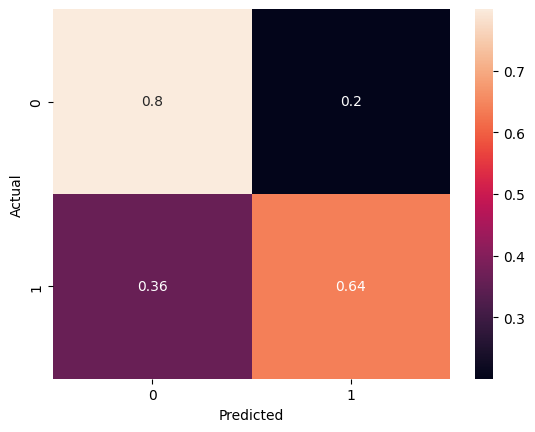

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=SVMSMOTE(random_state=42)
model = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

## 12.4.- Linear SVC

TRAIN
Accuracy score: 0.8277
Precision: 0.8172
Recall: 0.844
F1 Score: 0.8303
TEST
Accuracy score: 0.7963
Precisión: 0.2522
Recall: 0.6389
F1 Score: 0.3616


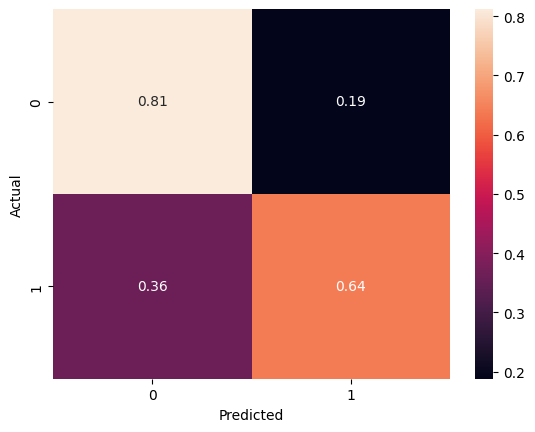

In [ ]:
dataframe_val=df
dataframe_test= df_test
preproceso=SVMSMOTE(random_state=42)
model = LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000)
modelo_preprocesado(dataframe_val, dataframe_test, model,preproceso)

SMOTE

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7366 | 0.6681 | 0.7212 | 0.7322 |
| Precision | 0.2052 | 0.1870 | 0.206 | 0.2036 |
| Recall | 0.6668 | 0.7994 | 0.7314 | 0.6750 |
| F1 | 0.3138 | 0.3032 | 0.3215 | 0.3129 |

ADASYN

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7276 | 0.6889 | 0.7125 | 0.7227 |
| Precision | 0.1992 | 0.1856 | 0.2013 | 0.1976 |
| Recall | 0.6673 | 0.7217 | 0.7360 | 0.6767 |
| F1 | 0.3068 | 0.2952 | 0.3162 | 0.3059 |

SVSMOTE

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7982 | 0.7742 | 0.7855| 0.7963|
| Precision | 0.2539 | 0.2287 | 0.2411 | 0.2522 |
| Recall | 0.6369 | 0.6323 | 0.6400 | 0.6389 |
| F1 | 0.3631 | 0.3359 | 0.3502 | 0.3616 |

De los tres modelos de generación sintética de muestras analizados, el SMOTE aplicado al Decision Tree Classifier obtiene el mejor recall, 0.7994, y que es comparable a otros métodos estudiados con ajuste de pesos o ensemble.

# 13.- Ensembles

## 13.1.- Balanced Bagging Classifier

### 13.1.1.- Logistic Regression

TRAIN
Accuracy score: 0.6916
Precision: 0.1973
Recall: 0.7943
F1 Score: 0.316
TEST
Accuracy score: 0.6902
Precision: 0.1961
Recall: 0.7839
F1 Score: 0.3137


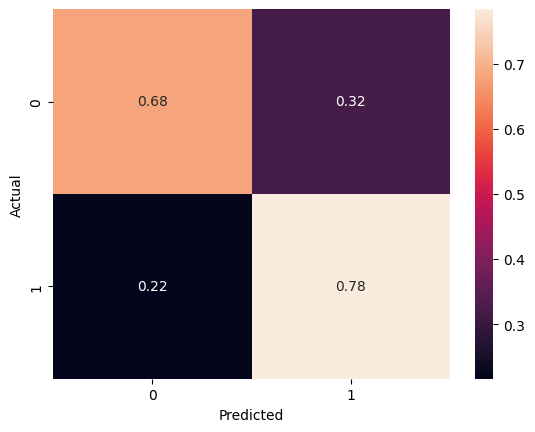

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier

dataframe_val=df
dataframe_test= df_test
bag1 = BalancedBaggingClassifier(estimator=LogisticRegression(max_iter=300, solver='newton-cholesky'),
                                n_estimators=100, # Cantidad de árboles
                                max_samples=100, # Muestras utilizadas en boostrapping
                                sampling_strategy='auto',
                                random_state=42)
model=bag1
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.1.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.7075
Precision: 0.2044
Recall: 0.7816
F1 Score: 0.3241
TEST
Accuracy score: 0.7071
Precision: 0.2044
Recall: 0.7758
F1 Score: 0.3236


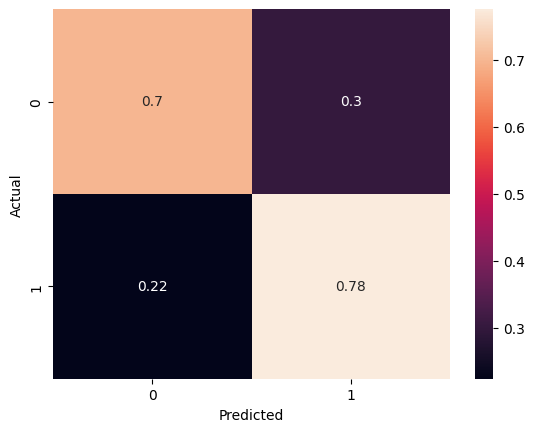

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

dataframe_val=df
dataframe_test= df_test
bag2 = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_split=2, random_state=42),
                                n_estimators=100, # Cantidad de árboles
                                max_samples=100, # Muestras utilizadas en boostrapping
                                sampling_strategy='auto',
                                random_state=42)
model=bag2
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.1.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.7487
Precision: 0.2246
Recall: 0.7342
F1 Score: 0.344
TEST
Accuracy score: 0.7498
Precision: 0.2274
Recall: 0.738
F1 Score: 0.3476


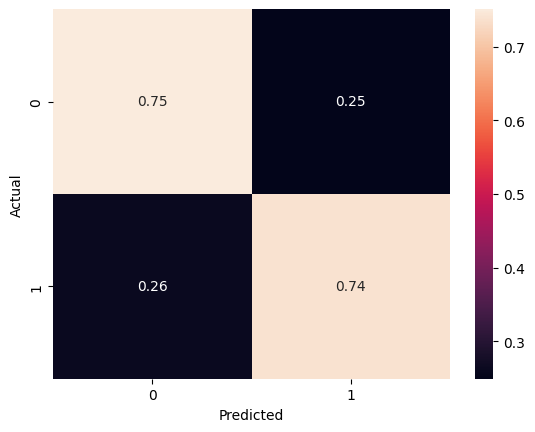

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = BalancedBaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42),
                                n_estimators=100, # Cantidad de árboles
                                max_samples=100, # Muestras utilizadas en boostrapping
                                sampling_strategy='auto',
                                random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.1.4.- Linear SVC

C:\Users\Alfonso\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TRAIN
Accuracy score: 0.7071
Precision: 0.2041
Recall: 0.7807
F1 Score: 0.3235
TEST
Accuracy score: 0.7069
Precision: 0.2039
Recall: 0.773
F1 Score: 0.3227


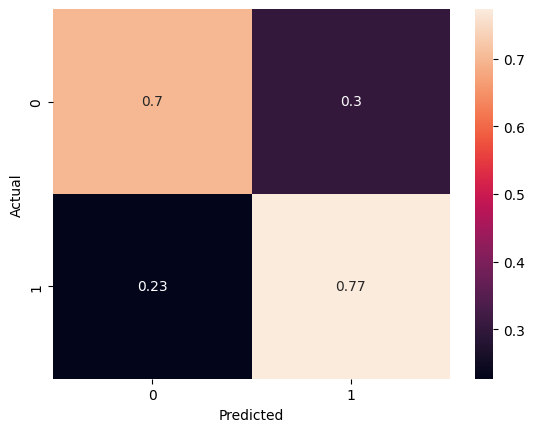

In [ ]:
dataframe_val=df
dataframe_test= df_test
model = BalancedBaggingClassifier(estimator=LinearSVC(C=10, class_weight='balanced', dual='auto', max_iter=100000),
                                n_estimators=100, # Cantidad de árboles
                                max_samples=100, # Muestras utilizadas en boostrapping
                                sampling_strategy='auto',
                                random_state=42)
aplicar_modelo(dataframe_val, dataframe_test, model)

## 13.2.- RUS Boost Classifier

### 13.2.1.- Logistic Regression

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

TRAIN
Accuracy score: 0.7309
Precision: 0.2181
Recall: 0.7735
F1 Score: 0.3403
TEST
Accuracy score: 0.7323
Precision: 0.2194
Recall: 0.7679
F1 Score: 0.3413


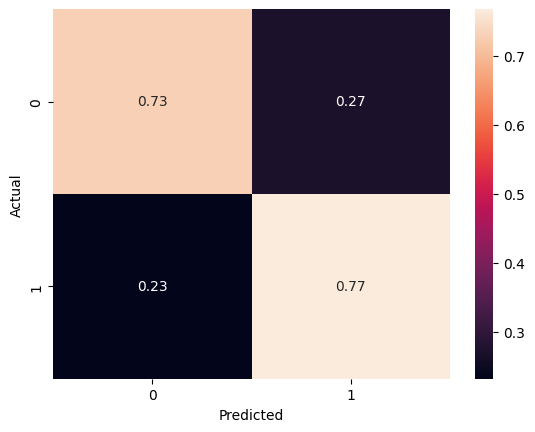

In [ ]:

dataframe_val=df
dataframe_test= df_test
estimator = LogisticRegression(class_weight='balanced', max_iter=10, solver='newton-cholesky')
rus1= RUSBoostClassifier(estimator=estimator,
                   n_estimators=200,
                   learning_rate=0.5,
                   random_state=42)

model=rus1
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.2.2.- Decision Tree Classifier

TRAIN
Accuracy score: 0.696
Precision: 0.2012
Recall: 0.8044
F1 Score: 0.3219
TEST
Accuracy score: 0.6945
Precision: 0.1991
Recall: 0.7886
F1 Score: 0.318


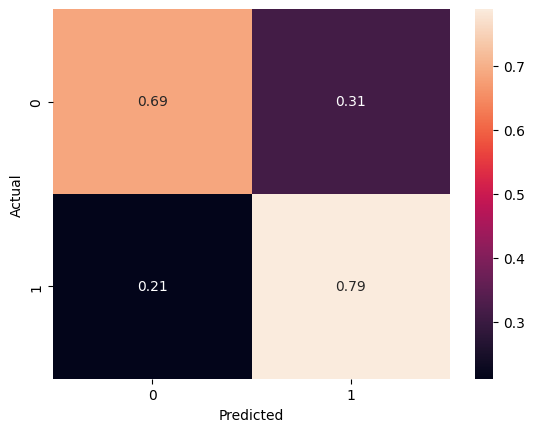

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

dataframe_val=df
dataframe_test= df_test
estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_split=2, random_state=42)
rus2= RUSBoostClassifier(estimator=estimator, 
                   n_estimators=200,
                   learning_rate=0.5,
                   random_state=42)

model=rus2
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.2.3.- Random Forest Classifier

TRAIN
Accuracy score: 0.7584
Precision: 0.2326
Recall: 0.7363
F1 Score: 0.3535
TEST
Accuracy score: 0.7561
Precision: 0.2295
Recall: 0.7211
F1 Score: 0.3481


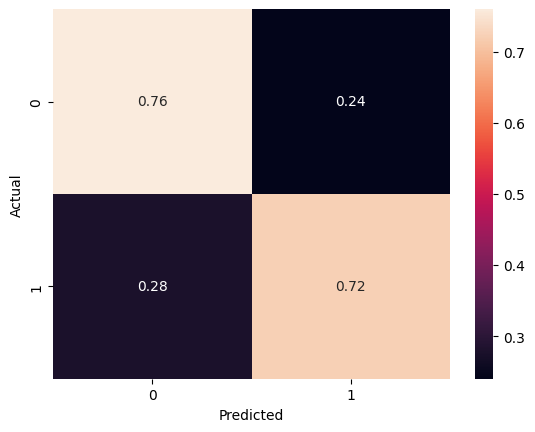

In [ ]:
dataframe_val=df
dataframe_test= df_test
estimator=RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=30, random_state=42)

rus3= RUSBoostClassifier(estimator=estimator, 
                   n_estimators=200,
                   learning_rate=0.5,
                   random_state=42)
model=rus3
aplicar_modelo(dataframe_val, dataframe_test, model)

### 13.2.4.- Linear SVC

TRAIN
Accuracy score: 0.7354
Precision: 0.2193
Recall: 0.7617
F1 Score: 0.3406
TEST
Accuracy score: 0.735
Precision: 0.2196
Recall: 0.7578
F1 Score: 0.3406


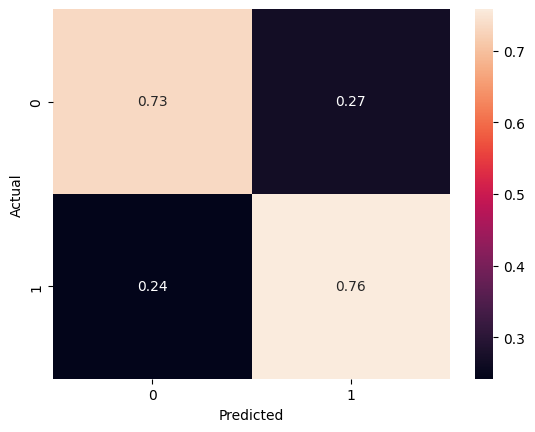

In [ ]:
dataframe_val=df
dataframe_test= df_test
estimator=LinearSVC(C=10, class_weight='balanced', dual='auto',max_iter=100000)

rus4= RUSBoostClassifier(estimator=estimator, 
                   n_estimators=200,
                   algorithm='SAMME',
                   learning_rate=0.5,
                   random_state=42)
model=rus4

aplicar_modelo(dataframe_val, dataframe_test, model)

Balanced Bagging Classifier

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.6902 | 0.7071 | 0.7498| 0.7069|
| Precision | 0.1961 | 0.2044 | 0.2274 | 0.2039 |
| Recall | 0.7839 | 0.7758 | 0.7380 | 0.7730 |
| F1 | 0.3137 | 0.3236 | 0.3476 | 0.3227 |

RUS Boost Classifier

| Parámetro | Logistic Regression | Decision Tree Classifier | Random Forest Classifier | Linear SVC |
| :-----------| :---------------:| :----------: | :-----------: | :-----------: |
| Accuracy | 0.7323 | 0.6945 | 0.7561 | 0.7350 |
| Precision | 0.2194 | 0.1991 | 0.2295 | 0.2196 |
| Recall | 0.7679 | 0.7886 | 0.7211 | 0.7578 |
| F1 | 0.3413 | 0.3180 | 0.3481 | 0.3406 |

# Selección del modelo

El modelo que ha aportado mejores resultados es el Decision Tree Classifier, con los hiperparámetros optimizados en el punto 7.3.

TRAIN
Accuracy score: 0.6348
Precision: 0.1788
Recall: 0.8545
F1 Score: 0.2957
TEST
Accuracy score: 0.6337
Precision: 0.1777
Recall: 0.8422
F1 Score: 0.2934


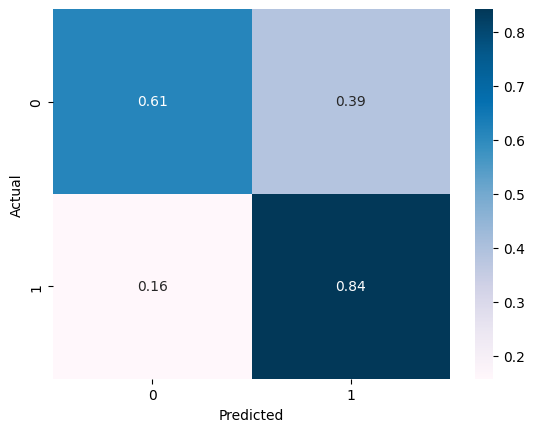

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42, min_samples_split=2 )
dataframe_val=df
dataframe_test= df_test
aplicar_modelo(dataframe_val, dataframe_test, model)